In [1]:
# Importing necessary modules
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from keras.regularizers import l2
import matplotlib.pyplot as plt
from plot_keras_history import show_history
import mlflow
import mlflow.keras
import numpy as np

2024-05-19 17:43:26.384496: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 17:43:26.591938: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 17:43:27.308942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 17:43:28.393539: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = np.load('cifar_dataset_processed.npz')

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

num_classes = 10

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')


(50000, 32, 32, 3) train input samples
(10000, 32, 32, 3) test input samples
(50000, 10) train output samples
(10000, 10) test output samples


In [3]:
# Function to run 10 sub experiments
def run_sub_experiments(x_train,x_test,y_train,y_test):
    with mlflow.start_run(run_name="CIFAR10") as parent_run: 
        
    # Simple CNN with Only One Convolutional Layer
        with mlflow.start_run(run_name="Sub-Experiment-1", nested=True):
            mlflow.keras.autolog()
            
            model = keras.Sequential()
            model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model.add(MaxPooling2D((2, 2)))
            model.add(Flatten())
            model.add(Dense(128, activation='relu'))
            model.add(Dense(10, activation='softmax'))
            model.summary()
            
            model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
            history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
            
            show_history(history)
            
            loss, acc = model.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model.save('models/model_1.keras')

        # CNN with Only three Convolutional Layers
        with mlflow.start_run(run_name="Sub-Experiment-2", nested=True):
            mlflow.keras.autolog()
            
            model1 = keras.Sequential()
            model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model1.add(MaxPooling2D((2, 2)))
            model1.add(Conv2D(64, (3, 3), activation='relu'))
            model1.add(MaxPooling2D((2, 2)))
            model1.add(Conv2D(64, (3, 3), activation='relu'))
            model1.add(Flatten())
            model1.add(Dense(64, activation='relu'))
            model1.add(Dense(10, activation='softmax'))
            model1.summary()
            
            model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
            history1 = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
            
            show_history(history1)
            
            loss, acc = model1.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model1.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model1.save('models/model_2.keras')
    
        # CNN with dropout
        with mlflow.start_run(run_name="Sub-Experiment-3", nested=True):
            mlflow.keras.autolog()
        
            model2 = keras.Sequential()
            model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model2.add(MaxPooling2D((2, 2)))
            model2.add(Dropout(0.25))
            model2.add(Conv2D(64, (3, 3), activation='relu'))
            model2.add(MaxPooling2D((2, 2)))
            model2.add(Dropout(0.25))
            model2.add(Conv2D(64, (3, 3), activation='relu'))
            model2.add(Flatten())
            model2.add(Dense(64, activation='relu'))
            model2.add(Dropout(0.5))
            model2.add(Dense(10, activation='softmax'))
            model2.summary()
            
            model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
            history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
            
            show_history(history2)
            
            loss, acc = model2.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model2.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model2.save('models/model_3.keras')
        
        # Using learning rates
        with mlflow.start_run(run_name="Sub-Experiment-4", nested=True):
            mlflow.keras.autolog()
            
            model3 = keras.Sequential()
            model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model3.add(MaxPooling2D((2, 2)))
            model3.add(Conv2D(64, (3, 3), activation='relu'))
            model3.add(MaxPooling2D((2, 2)))
            model3.add(Flatten())
            model3.add(Dense(256, activation='relu'))
            model3.add(Dense(10, activation='softmax'))
            model3.summary()
            
            opt_new = keras.optimizers.SGD(learning_rate=0.1)
            model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
            history3 = model3.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

            show_history(history3)
            
            loss, acc = model3.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model3.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model3.save('models/model_4.keras')
            
        
        # Using l2 regularization
        with mlflow.start_run(run_name="Sub-Experiment-5", nested=True):
            mlflow.keras.autolog()
        
            model4 = keras.Sequential()
            model4.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(32, 32, 3)))
            model4.add(MaxPooling2D((2, 2)))
            model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
            model4.add(MaxPooling2D((2, 2)))
            model4.add(Flatten())
            model4.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
            model4.add(Dense(10, activation='softmax'))
            model4.summary()
            
            model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
            history4 = model4.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
            
            show_history(history4)
            
            loss, acc = model4.evaluate(x_test, y_test, verbose=2)
            print("Test accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Test_Accuracy": acc})
            loss, acc = model4.evaluate(x_train, y_train, verbose=2)
            print("Train accuracy: {:5.2f}%".format(100*acc))
            mlflow.log_metrics({"Train_Accuracy": acc})

            model4.save('models/model_5.keras')
        
        
       
        
        
        



/home/dell/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

2024-05-19 17:44:20.308938: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3910 - loss: 1.6948

2024-05-19 17:44:51.362495: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.3912 - loss: 1.6944 - val_accuracy: 0.5515 - val_loss: 1.2568
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5777 - loss: 1.2036 - val_accuracy: 0.5825 - val_loss: 1.1636
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6304 - loss: 1.0571 - val_accuracy: 0.6091 - val_loss: 1.1145
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6748 - loss: 0.9372 - val_accuracy: 0.6358 - val_loss: 1.0653
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7064 - loss: 0.8467 - val_accuracy: 0.6038 - val_loss: 1.1852
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7364 - loss: 0.7584 - val_accuracy: 0.6433 - val_loss: 1.0715
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7664 - loss: 0.6795 - val_accuracy: 0.6365 - val_loss: 1.1612
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7945 - loss: 0.59

2024/05/19 17:49:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/dell/env/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


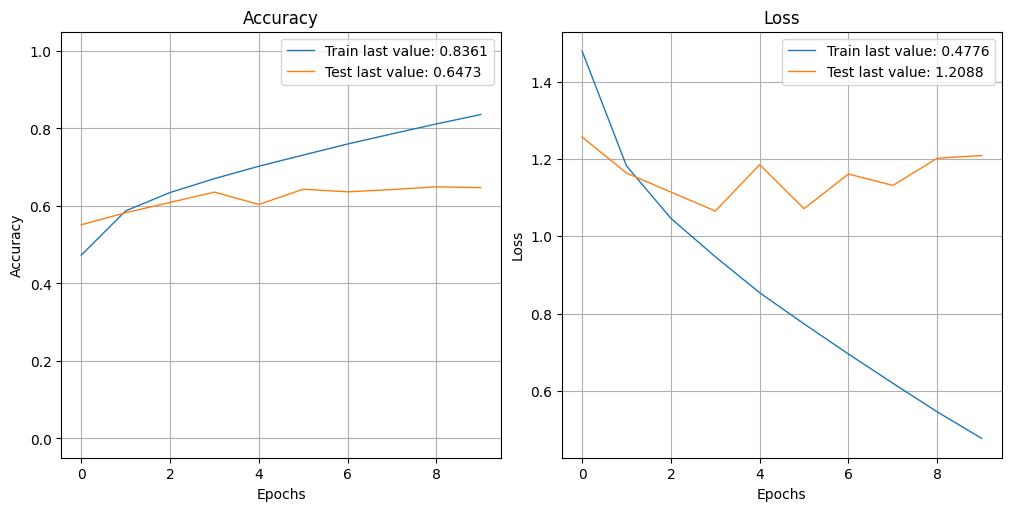

2024-05-19 17:49:07.848452: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - 3ms/step - accuracy: 0.6473 - loss: 1.2088
Test accuracy: 64.73%


2024-05-19 17:49:10.819284: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 - 5s - 3ms/step - accuracy: 0.8797 - loss: 0.3706
Train accuracy: 87.97%


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

2024-05-19 17:49:19.900469: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3331 - loss: 1.8111 - val_accuracy: 0.5314 - val_loss: 1.3130
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5684 - loss: 1.2184 - val_accuracy: 0.6283 - val_loss: 1.0707
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6494 - loss: 1.0056 - val_accuracy: 0.6677 - val_loss: 0.9477
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6953 - loss: 0.8791 - val_accuracy: 0.6587 - val_loss: 1.0286
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7245 - loss: 0.7980 - val_accuracy: 0.7055 - val_loss: 0.8739
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7467 - loss: 0.7244 - val_accuracy: 0.7151 - val_loss: 0.8667
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7703 - loss: 0.6563 - val_accuracy: 0.7151 - val_loss: 0.8566
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7876 -

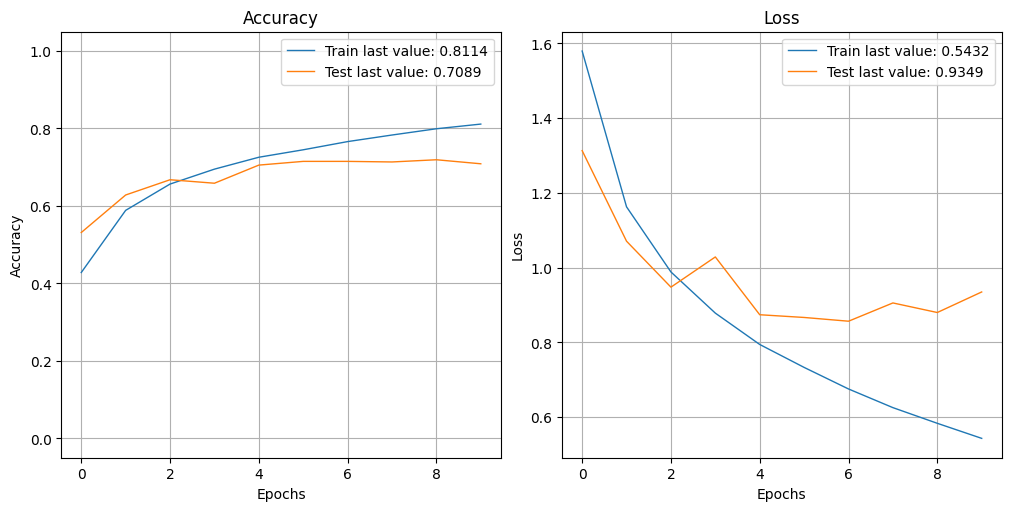

313/313 - 1s - 5ms/step - accuracy: 0.7089 - loss: 0.9349
Test accuracy: 70.89%
1563/1563 - 9s - 5ms/step - accuracy: 0.8354 - loss: 0.4675
Train accuracy: 83.54%


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.2713 - loss: 1.9624 - val_accuracy: 0.4632 - val_loss: 1.5004
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4798 - loss: 1.4515 - val_accuracy: 0.5834 - val_loss: 1.1840
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5416 - loss: 1.3124 - val_accuracy: 0.5736 - val_loss: 1.2048
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5640 - loss: 1.2676 - val_accuracy: 0.5271 - val_loss: 1.4157
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5699 - loss: 1.2610 - val_accuracy: 0.6238 - val_loss: 1.0995
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5852 - loss: 1.2474 - val_accuracy: 0.4988 - val_loss: 1.7483
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5797 - loss: 1.2705 - val_accuracy: 0.5932 - val_loss: 1.1762
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.5771 -

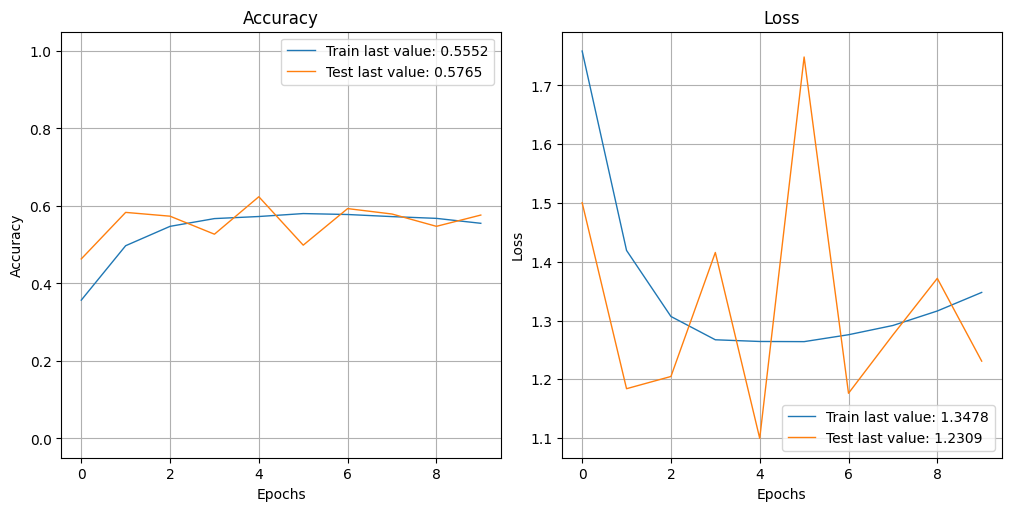

313/313 - 2s - 5ms/step - accuracy: 0.5765 - loss: 1.2309
Test accuracy: 57.65%
1563/1563 - 9s - 6ms/step - accuracy: 0.5966 - loss: 1.1762
Train accuracy: 59.66%


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,042 (2.33 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3094 - loss: 1.9072 - val_accuracy: 0.5299 - val_loss: 1.3257
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5729 - loss: 1.2126 - val_accuracy: 0.5785 - val_loss: 1.1845
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6716 - loss: 0.9473 - val_accuracy: 0.6403 - val_loss: 1.0445
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7312 - loss: 0.7753 - val_accuracy: 0.6644 - val_loss: 0.9828
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7868 - loss: 0.6186 - val_accuracy: 0.6817 - val_loss: 0.9900
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8355 - loss: 0.4658 - val_accuracy: 0.6699 - val_loss: 1.1108
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8746 - loss: 0.3603 - val_accuracy: 0.6565 - val_loss: 1.2410
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9061 -

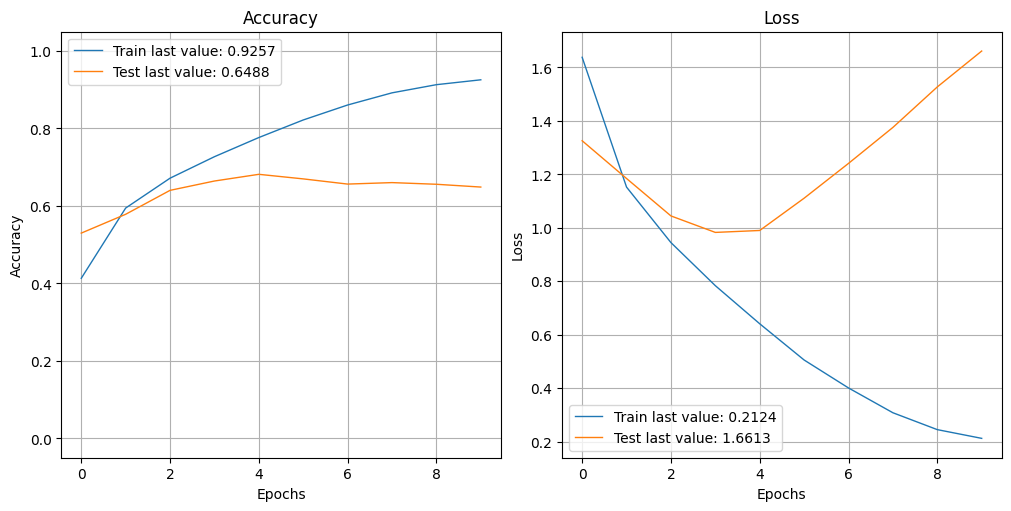

313/313 - 2s - 5ms/step - accuracy: 0.6488 - loss: 1.6613
Test accuracy: 64.88%
1563/1563 - 8s - 5ms/step - accuracy: 0.9015 - loss: 0.2848
Train accuracy: 90.15%


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3148 - loss: 2.1730 - val_accuracy: 0.4350 - val_loss: 1.7281
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4536 - loss: 1.7230 - val_accuracy: 0.4638 - val_loss: 1.6519
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4828 - loss: 1.6393 - val_accuracy: 0.5153 - val_loss: 1.5395
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5018 - loss: 1.5915 - val_accuracy: 0.5191 - val_loss: 1.5445
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5172 - loss: 1.5584 - val_accuracy: 0.4648 - val_loss: 1.7812
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5272 - loss: 1.5352 - val_accuracy: 0.5125 - val_loss: 1.5660
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5341 - loss: 1.5100 - val_accuracy: 0.5413 - val_loss: 1.4871
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5429 -

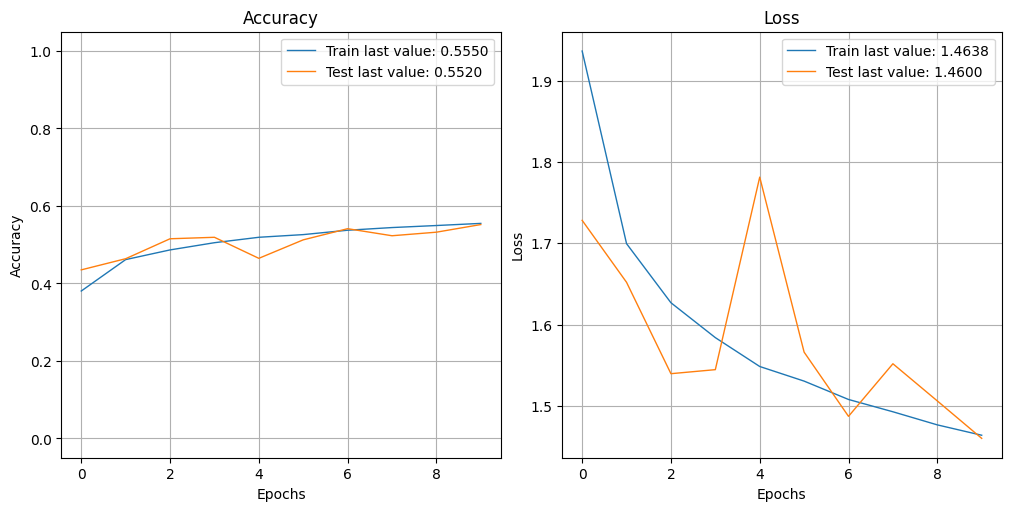

313/313 - 1s - 5ms/step - accuracy: 0.5520 - loss: 1.4600
Test accuracy: 55.20%
1563/1563 - 8s - 5ms/step - accuracy: 0.5546 - loss: 1.4452
Train accuracy: 55.46%


In [4]:
run_sub_experiments(x_train,x_test,y_train,y_test)    